In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from itertools import groupby

headers = ["Time", "FPS", "Triangles", "Draw Calls", "Vertices", "Memory Usage", 
           "GPU Usage", "Alive Particles VFX", "Alive Particles BuiltIn", "Particles On"]

file_path = '15-05-2024/*.csv'
files = sorted(glob.glob(file_path))

# Load data into DataFrames
data_frames = {os.path.basename(file).split('.')[0]: pd.read_csv(file, names=headers) for file in files}

for name, df in data_frames.items():
    df['Relative Time'] = df['Time'] - df['Time'].iloc[0]

# Ensure proper sorting by the key used for grouping
sorted_keys = sorted(data_frames.keys(), key=lambda x: '_'.join(x.split('_')[1:-1]))

# Group filenames by the part of the name indicating the configuration
grouped_files = {}
grouped_tests = {}
for key, group in groupby(sorted_keys, key=lambda x: '_'.join(x.split('_')[1:-1])):
    group_list = list(group)  # Convert iterator to list to avoid exhausting it
    grouped_files[key] = [data_frames[g] for g in group_list]
    grouped_tests[key] = group_list

# Calculating averaged dataframes
averaged_dataframes = {}
for config, dfs in grouped_files.items():
    concatenated_df = pd.concat(dfs)
    averaged_df = concatenated_df.groupby(concatenated_df.index).mean()
    averaged_dataframes[config] = averaged_df

# Now print to check if the test IDs are captured correctly
print("Grouped Tests:")
for k, v in grouped_tests.items():
    print(f"{k}: {v}")



Grouped Tests:
BuiltIn_PassthroughFalse_2024-05-15: ['RecordedData_BuiltIn_PassthroughFalse_2024-05-15_14-39-54', 'RecordedData_BuiltIn_PassthroughFalse_2024-05-15_14-40-22', 'RecordedData_BuiltIn_PassthroughFalse_2024-05-15_14-40-51']
BuiltIn_PassthroughTrue_2024-05-15: ['RecordedData_BuiltIn_PassthroughTrue_2024-05-15_14-41-19', 'RecordedData_BuiltIn_PassthroughTrue_2024-05-15_14-41-47', 'RecordedData_BuiltIn_PassthroughTrue_2024-05-15_14-42-15']
VFX_PassthroughFalse_2024-05-15: ['RecordedData_VFX_PassthroughFalse_2024-05-15_14-37-04', 'RecordedData_VFX_PassthroughFalse_2024-05-15_14-37-33', 'RecordedData_VFX_PassthroughFalse_2024-05-15_14-38-01']
VFX_PassthroughTrue_2024-05-15: ['RecordedData_VFX_PassthroughTrue_2024-05-15_14-38-30', 'RecordedData_VFX_PassthroughTrue_2024-05-15_14-38-58', 'RecordedData_VFX_PassthroughTrue_2024-05-15_14-39-26']
none_PassthroughFalse_2024-05-15: ['RecordedData_none_PassthroughFalse_2024-05-15_14-42-43', 'RecordedData_none_PassthroughFalse_2024-05-15_1

In [2]:
descriptive_titles = {
    'VFX_PassthroughFalse_2024-05-15': "VFX particle effect, immersive mode",
    'VFX_PassthroughTrue_2024-05-15': "VFX particle effect, passthrough mode",
    'BuiltIn_PassthroughFalse_2024-05-15': "Built-in particle effect, immersive mode",
    'BuiltIn_PassthroughTrue_2024-05-15': "Built-in particle effect, passthrough mode",
    'none_PassthroughFalse_2024-05-15': "No particle effect, immersive mode",
    'none_PassthroughTrue_2024-05-15': "No particle effect, passthrough mode",
}


In [3]:
for name, df in data_frames.items():
    print(f"Description of {name}:")
    print(df.describe())
    print("\n")  # Adds a newline for better separation


Description of RecordedData_BuiltIn_PassthroughFalse_2024-05-15_14-39-54:
              Time          FPS      Triangles   Draw Calls       Vertices  \
count  2338.000000  2338.000000    2338.000000  2338.000000    2338.000000   
mean    189.772670    89.979953  336882.005988    12.778871  190792.804534   
std       7.504073     0.507191   88880.756111    11.502501   48725.307316   
min     176.790100    87.804790       0.000000     0.000000       0.000000   
25%     183.282650    89.781370  367820.000000     8.000000  206865.000000   
50%     189.773150    89.934570  368492.000000     8.000000  208209.000000   
75%     196.270450    90.335660  373224.000000    10.000000  210097.000000   
max     202.756900    90.934590  397230.000000    48.000000  223995.000000   

       Memory Usage  GPU Usage  Alive Particles VFX  Alive Particles BuiltIn  \
count  2.338000e+03     2338.0               2338.0              2338.000000   
mean   1.437572e+08        0.0                  0.0            

In [4]:
# Print keys to verify them
print("Keys in grouped_tests:", grouped_tests.keys())

# Also print the test_ids to see if they are correct when accessed
if config_key in grouped_tests:
    test_ids = grouped_tests[config_key]
    print(f"Test IDs for {config_key}: {test_ids}")
else:
    print(f"No test IDs found for {config_key}")


Keys in grouped_tests: dict_keys(['BuiltIn_PassthroughFalse_2024-05-15', 'BuiltIn_PassthroughTrue_2024-05-15', 'VFX_PassthroughFalse_2024-05-15', 'VFX_PassthroughTrue_2024-05-15', 'none_PassthroughFalse_2024-05-15', 'none_PassthroughTrue_2024-05-15'])


NameError: name 'config_key' is not defined

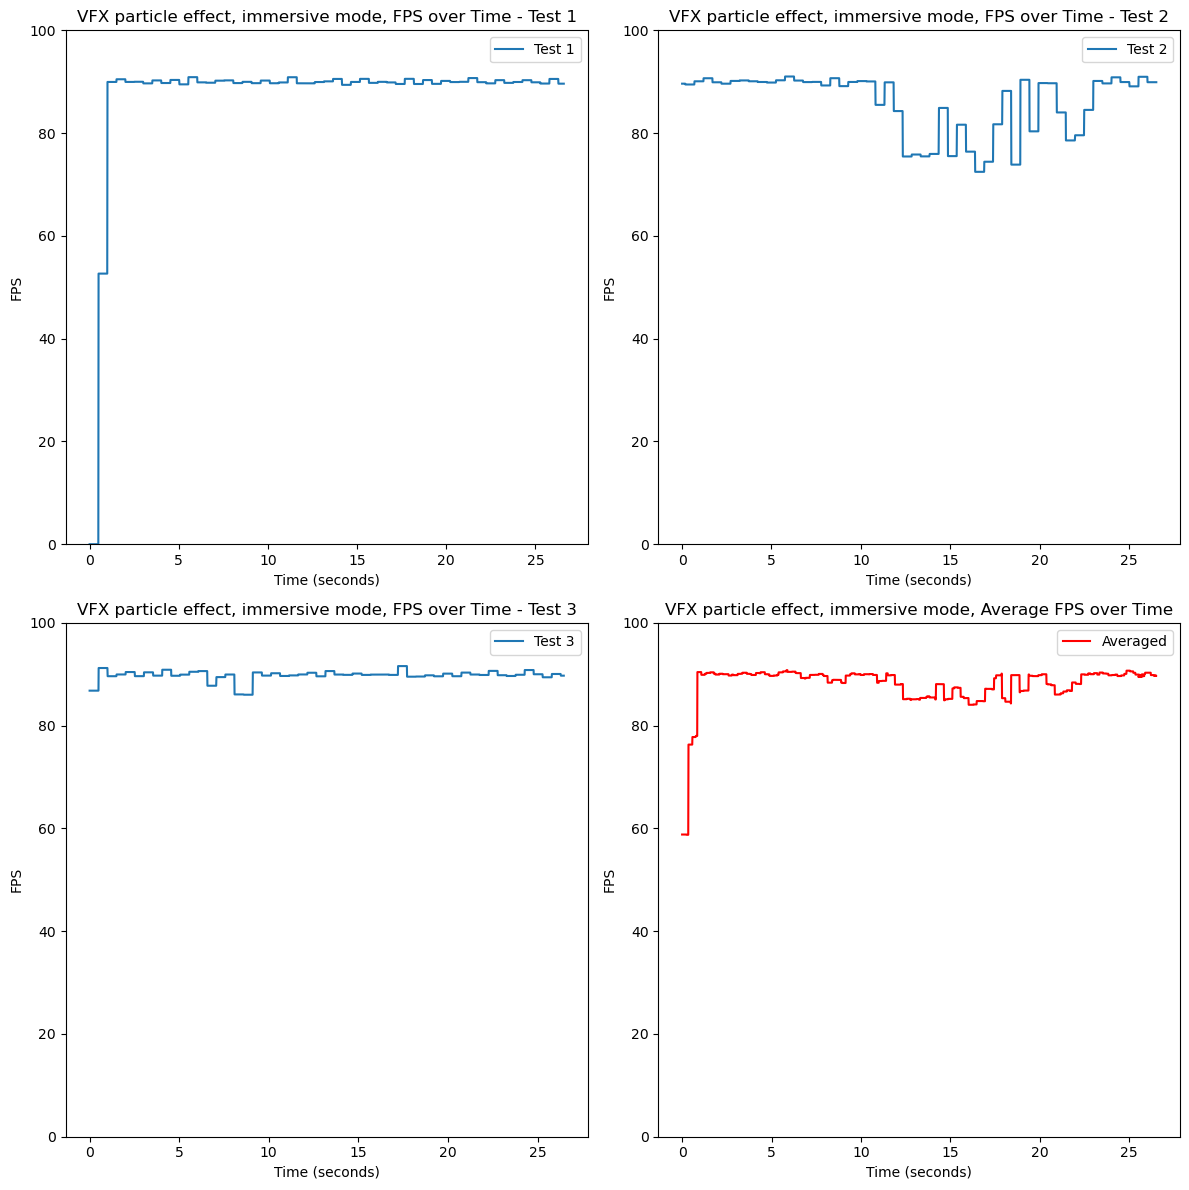

In [5]:
import matplotlib.pyplot as plt

config_key = 'VFX_PassthroughFalse_2024-05-15'

if config_key in grouped_tests:
    test_ids = grouped_tests[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Set up a 2x2 grid for subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 12), squeeze=False)  # Adjust figsize as needed

    # Flatten axs array for easier indexing
    axs = axs.flatten()

    # Plot each test on its respective axis
    for i, test_id in enumerate(test_ids):
        if test_id in data_frames:
            axs[i].plot(data_frames[test_id]['Relative Time'], data_frames[test_id]['FPS'], label=f'Test {i+1}')
            axs[i].set_title(f'{description}, FPS over Time - Test {i+1}')
            axs[i].set_xlabel('Time (seconds)')
            axs[i].set_ylabel('FPS')
            axs[i].legend()
            axs[i].set_ylim([0, 100])

    # Plotting the averaged data on the last subplot
    if config_key in averaged_dataframes:
        axs[len(test_ids)].plot(averaged_dataframes[config_key]['Relative Time'], averaged_dataframes[config_key]['FPS'], label='Averaged', color='red')
        axs[len(test_ids)].set_title(f'{description}, Average FPS over Time')
        axs[len(test_ids)].set_xlabel('Time (seconds)')
        axs[len(test_ids)].set_ylabel('FPS')
        axs[len(test_ids)].legend()
        axs[len(test_ids)].set_ylim([0, 100])

    # Hide unused axes if any (e.g., if there are less than 4 plots to display)
    for ax in axs[len(test_ids) + 1:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()



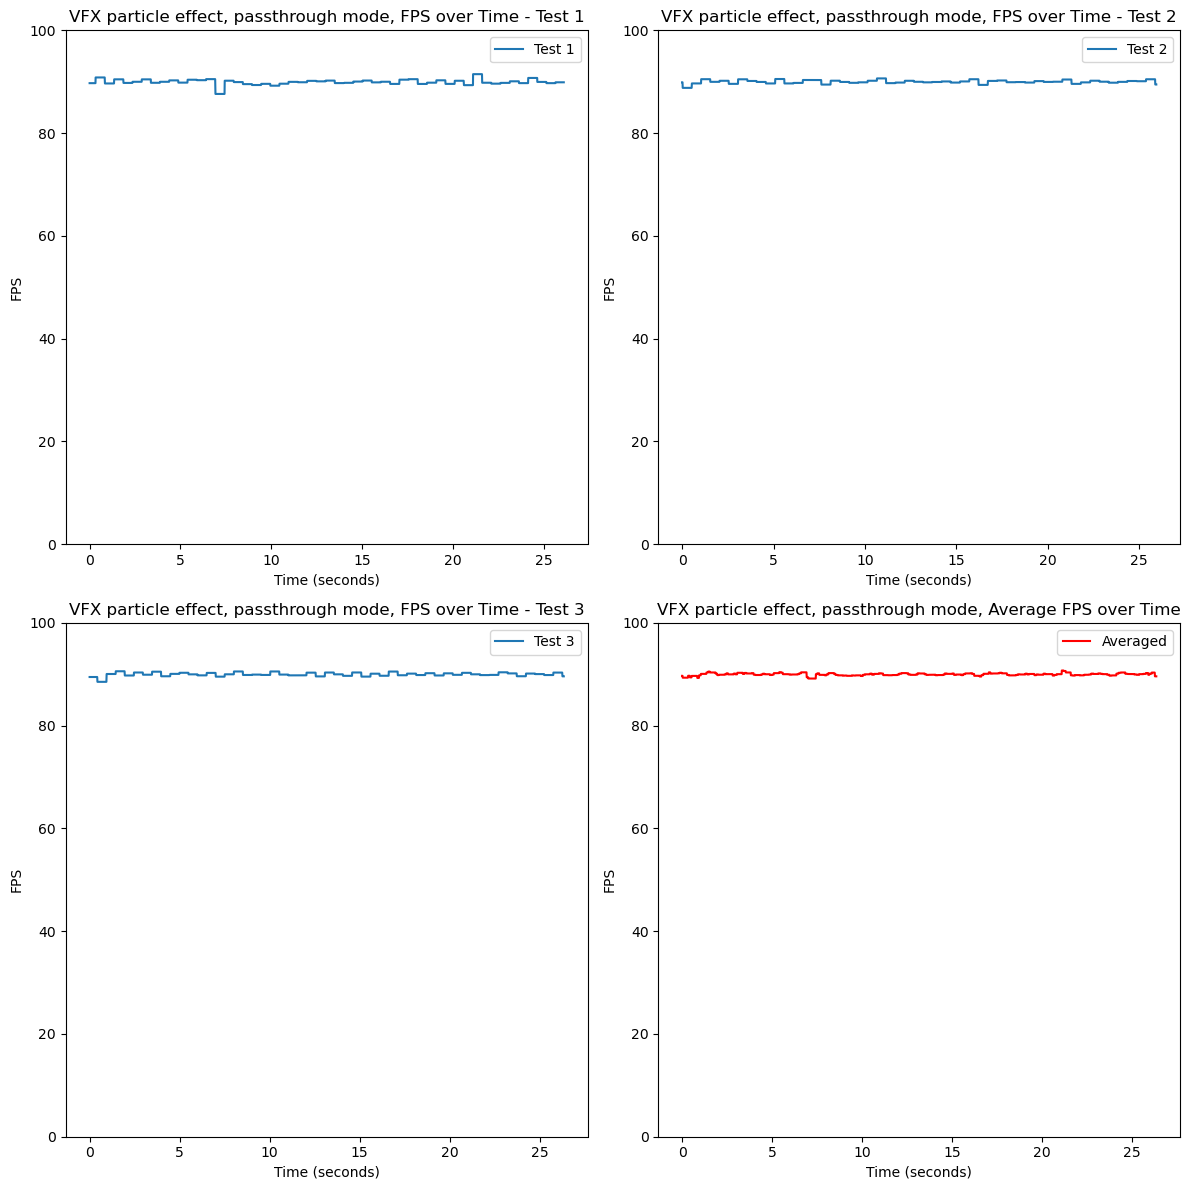

In [6]:
import matplotlib.pyplot as plt

config_key = 'VFX_PassthroughTrue_2024-05-15'

if config_key in grouped_tests:
    test_ids = grouped_tests[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Set up a 2x2 grid for subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 12), squeeze=False)  # Adjust figsize as needed

    # Flatten axs array for easier indexing
    axs = axs.flatten()

    # Plot each test on its respective axis
    for i, test_id in enumerate(test_ids):
        if test_id in data_frames:
            axs[i].plot(data_frames[test_id]['Relative Time'], data_frames[test_id]['FPS'], label=f'Test {i+1}')
            axs[i].set_title(f'{description}, FPS over Time - Test {i+1}')
            axs[i].set_xlabel('Time (seconds)')
            axs[i].set_ylabel('FPS')
            axs[i].legend()
            axs[i].set_ylim([0, 100])

    # Plotting the averaged data on the last subplot
    if config_key in averaged_dataframes:
        axs[len(test_ids)].plot(averaged_dataframes[config_key]['Relative Time'], averaged_dataframes[config_key]['FPS'], label='Averaged', color='red')
        axs[len(test_ids)].set_title(f'{description}, Average FPS over Time')
        axs[len(test_ids)].set_xlabel('Time (seconds)')
        axs[len(test_ids)].set_ylabel('FPS')
        axs[len(test_ids)].legend()
        axs[len(test_ids)].set_ylim([0, 100])

    # Hide unused axes if any (e.g., if there are less than 4 plots to display)
    for ax in axs[len(test_ids) + 1:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

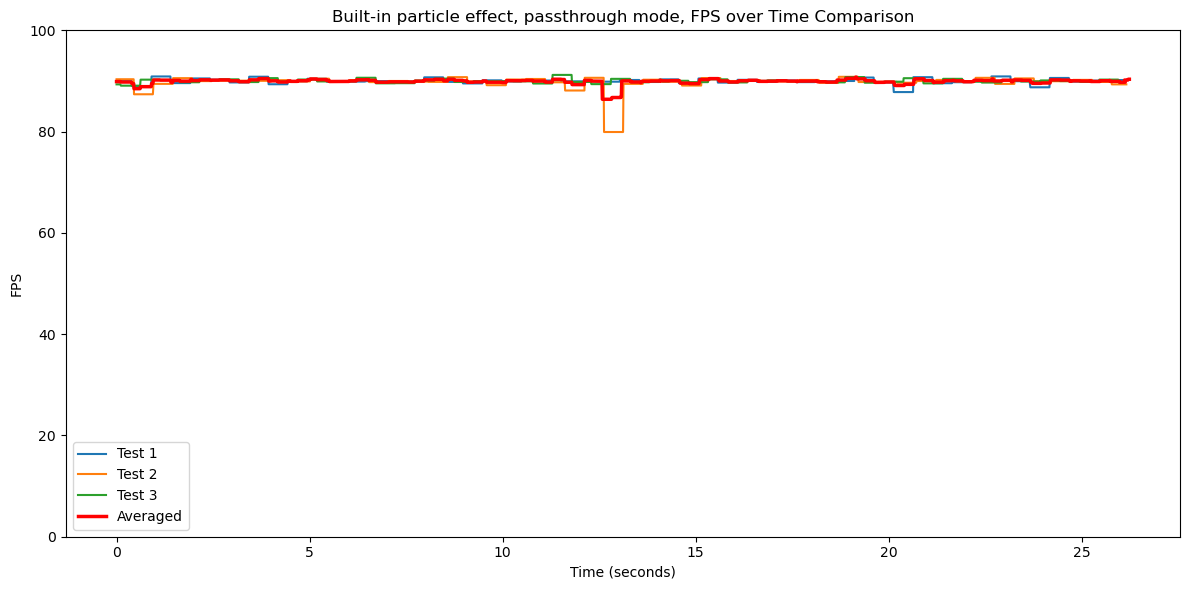

In [13]:
import matplotlib.pyplot as plt

# Specify the configuration key for the group of tests you want to plot
config_key = 'BuiltIn_PassthroughTrue_2024-05-15'

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed

# Check if the config_key is present in grouped_tests and if there are corresponding averaged data
if config_key in grouped_tests:
    test_ids = grouped_tests[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Plot each test from the group on the same axes
    for i, test_id in enumerate(test_ids):
        if test_id in data_frames:
            ax.plot(data_frames[test_id]['Relative Time'], data_frames[test_id]['FPS'], label=f'Test {i+1}')

    # Plot the averaged data on the same axes
    if config_key in averaged_dataframes:
        ax.plot(averaged_dataframes[config_key]['Relative Time'], averaged_dataframes[config_key]['FPS'], label='Averaged', color='red', linewidth=2.5)

    # Setting the title and labels with dynamic elements based on the config_key
    ax.set_title(f'{description}, FPS over Time Comparison')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('FPS')
    ax.set_ylim([0, 100])  # Set consistent Y-axis limits for comparison
    ax.legend()

    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for {config_key}")

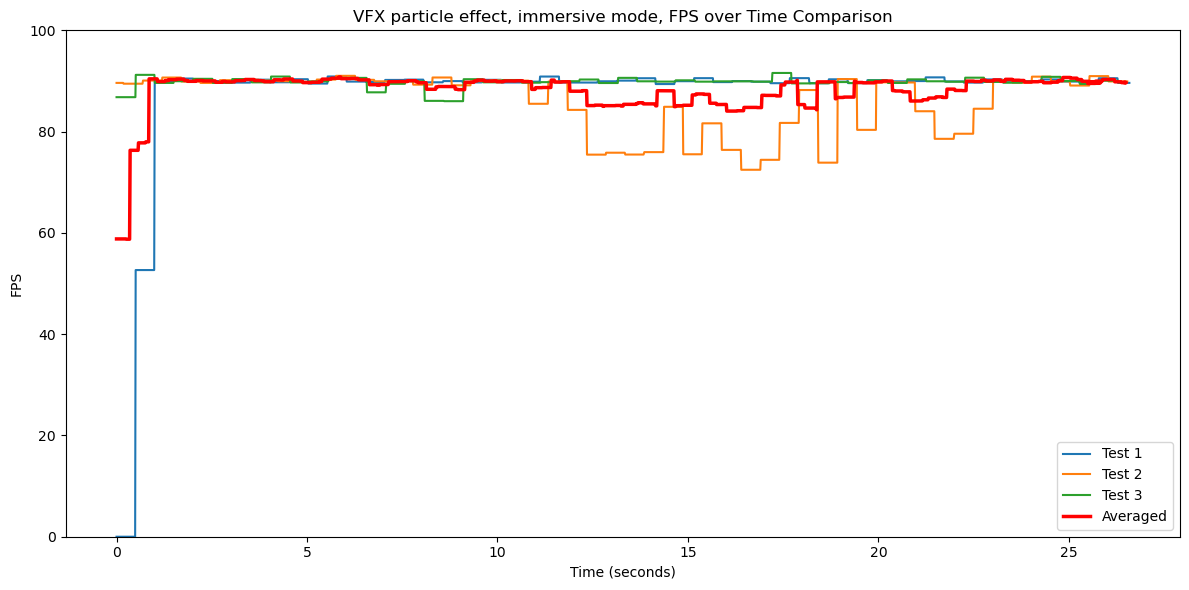

In [7]:
import matplotlib.pyplot as plt

# Specify the configuration key for the group of tests you want to plot
config_key = 'VFX_PassthroughFalse_2024-05-15'

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed

# Check if the config_key is present in grouped_tests and if there are corresponding averaged data
if config_key in grouped_tests:
    test_ids = grouped_tests[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Plot each test from the group on the same axes
    for i, test_id in enumerate(test_ids):
        if test_id in data_frames:
            ax.plot(data_frames[test_id]['Relative Time'], data_frames[test_id]['FPS'], label=f'Test {i+1}')

    # Plot the averaged data on the same axes
    if config_key in averaged_dataframes:
        ax.plot(averaged_dataframes[config_key]['Relative Time'], averaged_dataframes[config_key]['FPS'], label='Averaged', color='red', linewidth=2.5)

    # Setting the title and labels with dynamic elements based on the config_key
    ax.set_title(f'{description}, FPS over Time Comparison')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('FPS')
    ax.set_ylim([0, 100])  # Set consistent Y-axis limits for comparison
    ax.legend()

    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for {config_key}")


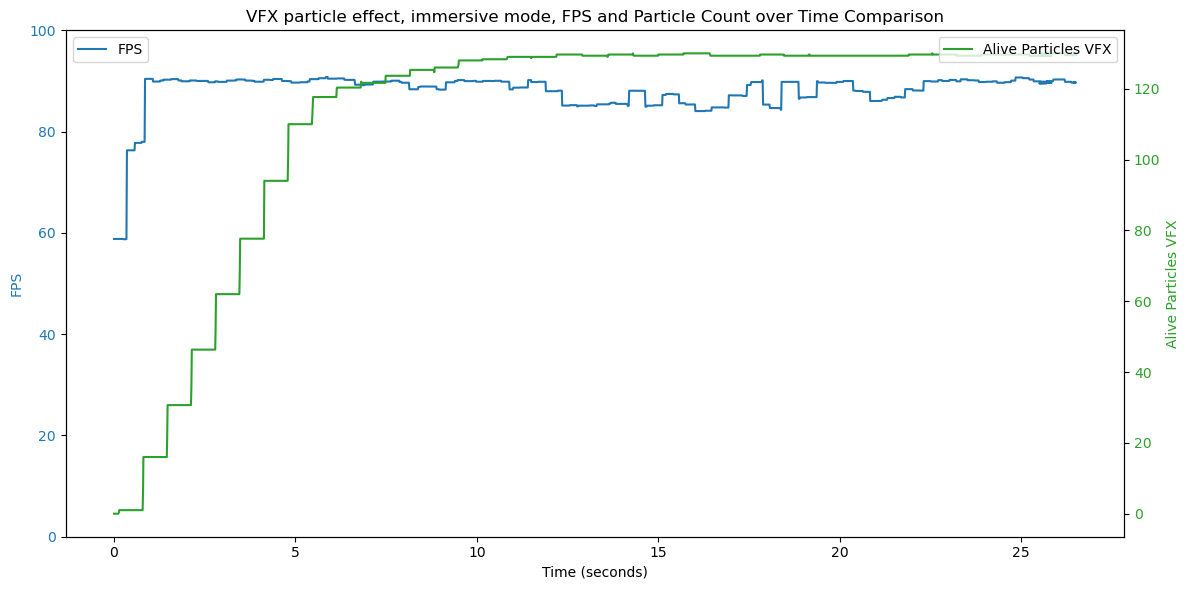

In [8]:
import matplotlib.pyplot as plt

# Specify the configuration key for the data you want to plot
config_key = 'VFX_PassthroughFalse_2024-05-15'

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Single plot, adjust the size as needed

# Check if the config_key is in the averaged data
if config_key in averaged_dataframes:
    data = averaged_dataframes[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Plot FPS data on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('FPS', color=color)
    ax1.set_ylim([0, 100])
    ax1.plot(data['Relative Time'], data['FPS'], label='FPS', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for Alive Particles VFX
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:green'
    ax2.set_ylabel('Alive Particles VFX', color=color)  # we already handled the x-label with ax1
    ax2.plot(data['Relative Time'], data['Alive Particles VFX'], label='Alive Particles VFX', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    # Setting the title
    ax1.set_title(f'{description}, FPS and Particle Count over Time Comparison')

    plt.tight_layout()
    plt.show()
else:
    print(f"No averaged data found for {config_key}")


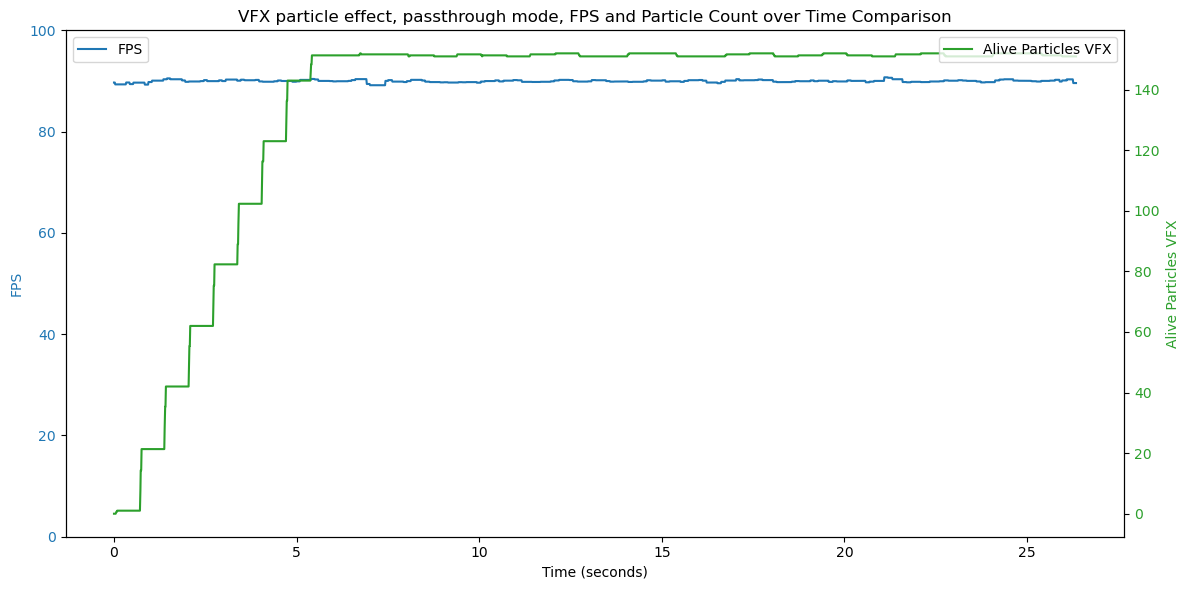

In [9]:
import matplotlib.pyplot as plt

# Specify the configuration key for the data you want to plot
config_key = 'VFX_PassthroughTrue_2024-05-15'

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Single plot, adjust the size as needed

# Check if the config_key is in the averaged data
if config_key in averaged_dataframes:
    data = averaged_dataframes[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Plot FPS data on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('FPS', color=color)
    ax1.set_ylim([0, 100])
    ax1.plot(data['Relative Time'], data['FPS'], label='FPS', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for Alive Particles VFX
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:green'
    ax2.set_ylabel('Alive Particles VFX', color=color)  # we already handled the x-label with ax1
    ax2.plot(data['Relative Time'], data['Alive Particles VFX'], label='Alive Particles VFX', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    # Setting the title
    ax1.set_title(f'{description}, FPS and Particle Count over Time Comparison')

    plt.tight_layout()
    plt.show()
else:
    print(f"No averaged data found for {config_key}")

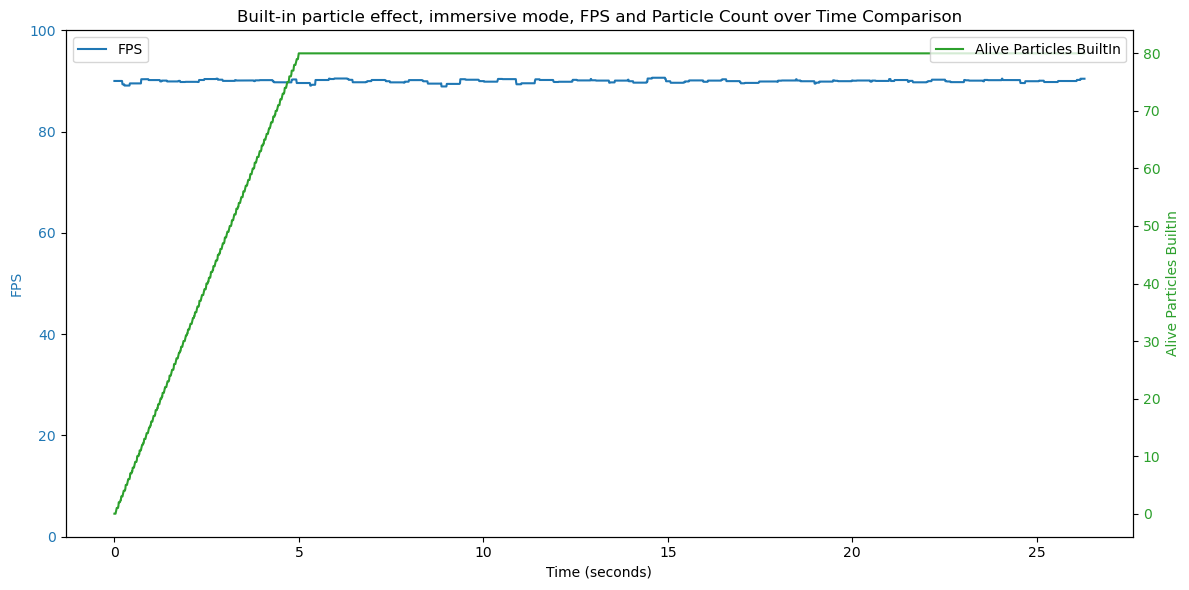

In [10]:
import matplotlib.pyplot as plt

# Specify the configuration key for the data you want to plot
config_key = 'BuiltIn_PassthroughFalse_2024-05-15'

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Single plot, adjust the size as needed

# Check if the config_key is in the averaged data
if config_key in averaged_dataframes:
    data = averaged_dataframes[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Plot FPS data on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('FPS', color=color)
    ax1.set_ylim([0, 100])
    ax1.plot(data['Relative Time'], data['FPS'], label='FPS', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for Alive Particles VFX
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:green'
    ax2.set_ylabel('Alive Particles BuiltIn', color=color)  # we already handled the x-label with ax1
    ax2.plot(data['Relative Time'], data['Alive Particles BuiltIn'], label='Alive Particles BuiltIn', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    # Setting the title
    ax1.set_title(f'{description}, FPS and Particle Count over Time Comparison')

    plt.tight_layout()
    plt.show()
else:
    print(f"No averaged data found for {config_key}")

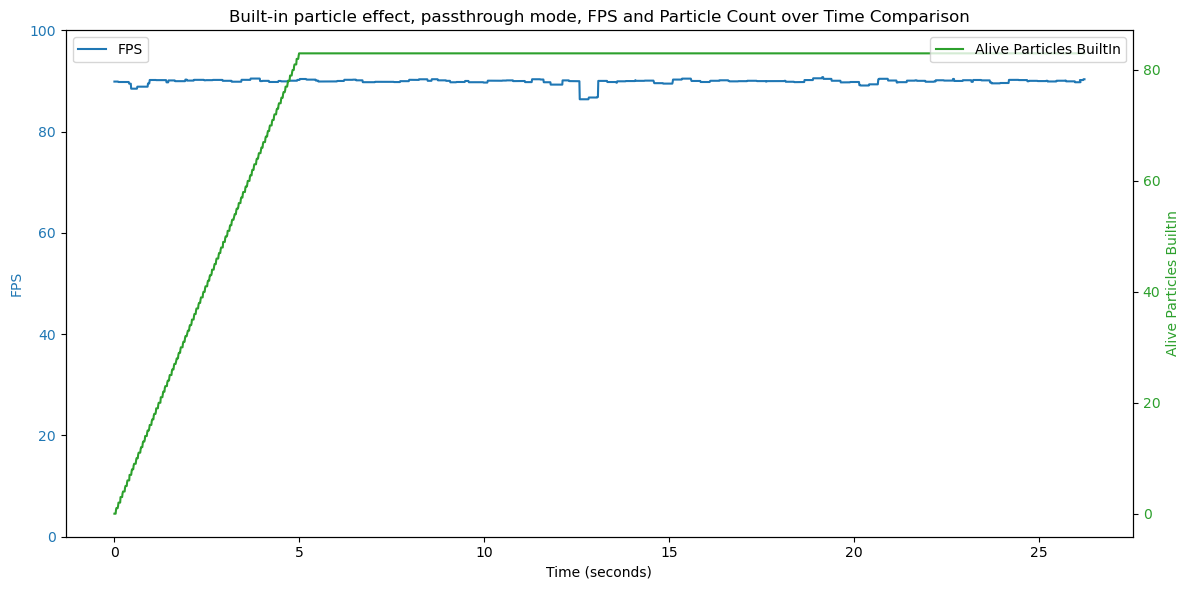

In [11]:
import matplotlib.pyplot as plt

# Specify the configuration key for the data you want to plot
config_key = 'BuiltIn_PassthroughTrue_2024-05-15'

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Single plot, adjust the size as needed

# Check if the config_key is in the averaged data
if config_key in averaged_dataframes:
    data = averaged_dataframes[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Plot FPS data on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('FPS', color=color)
    ax1.set_ylim([0, 100])
    ax1.plot(data['Relative Time'], data['FPS'], label='FPS', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for Alive Particles VFX
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:green'
    ax2.set_ylabel('Alive Particles BuiltIn', color=color)  # we already handled the x-label with ax1
    ax2.plot(data['Relative Time'], data['Alive Particles BuiltIn'], label='Alive Particles BuiltIn', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    # Setting the title
    ax1.set_title(f'{description}, FPS and Particle Count over Time Comparison')

    plt.tight_layout()
    plt.show()
else:
    print(f"No averaged data found for {config_key}")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

config_key = 'VFX_PassthroughTrue_2024-05-15'
df = averaged_dataframes[config_key]

# Find the index where FPS first reaches 90
first_90_index = df[df['FPS'] >= 90].index.min()

# Trim the DataFrame from this point
trimmed_df = df.loc[first_90_index:]

# Extracting the variables for regression from the trimmed data
x = trimmed_df['Alive Particles VFX'].values.reshape(-1, 1)
y = trimmed_df['FPS'].values

# Initialize and fit the polynomial model
degree = 2  # You can adjust this based on the complexity of the relationship
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(x, y)

# Predictions for visualization
y_poly_pred = poly_model.predict(x)

# Evaluate the model
print("R-squared:", poly_model.score(x, y))

def fps_to_maintain_90(particles):
    # Reshape particles to be 2D for prediction
    particles_reshaped = np.array(particles).reshape(1, -1)
    print("Shape before prediction:", particles_reshaped.shape)  # This line will confirm the shape
    fps_pred = poly_model.predict(particles_reshaped)[0]
    return fps_pred - 90


# Use fsolve to find the particle count for 90 FPS
initial_guess = 125  # Mid-range guess based on your data
particle_count_for_90_fps = fsolve(fps_to_maintain_90, initial_guess)

print("Estimated number of Alive Particles to maintain 90 FPS:", particle_count_for_90_fps[0])

# Plotting the data and the polynomial regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', label='Actual FPS')
plt.plot(x, y_poly_pred, color='red', label='Predicted FPS')
plt.xlabel('Alive Particles VFX')
plt.ylabel('FPS')
plt.title('Polynomial Regression Fit: FPS vs Alive Particles VFX')
plt.legend()
plt.show()



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

config_key = 'VFX_PassthroughFalse_2024-05-15'
df = averaged_dataframes[config_key]

# Find the index where FPS first reaches 90
first_90_index = df[df['FPS'] >= 90].index.min()

# Trim the DataFrame from this point
trimmed_df = df.loc[first_90_index:]

# Extracting the variables for regression from the trimmed data
x = trimmed_df['Alive Particles VFX'].values.reshape(-1, 1)
y = trimmed_df['FPS'].values

# Initialize and fit the polynomial model
degree = 2  # You can adjust this based on the complexity of the relationship
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(x, y)

# Predictions for visualization
y_poly_pred = poly_model.predict(x)

# Evaluate the model
print("R-squared:", poly_model.score(x, y))

def fps_to_maintain_90(particles):
    # Reshape particles to be 2D for prediction
    particles_reshaped = np.array(particles).reshape(1, -1)
    print("Shape before prediction:", particles_reshaped.shape)  # This line will confirm the shape
    fps_pred = poly_model.predict(particles_reshaped)[0]
    return fps_pred - 90


# Use fsolve to find the particle count for 90 FPS
initial_guess = 125  # Mid-range guess based on your data
particle_count_for_90_fps = fsolve(fps_to_maintain_90, initial_guess)

print("Estimated number of Alive Particles to maintain 90 FPS:", particle_count_for_90_fps[0])

# Plotting the data and the polynomial regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', label='Actual FPS')
plt.plot(x, y_poly_pred, color='red', label='Predicted FPS')
plt.xlabel('Alive Particles VFX')
plt.ylabel('FPS')
plt.title('Polynomial Regression Fit: FPS vs Alive Particles VFX')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

config_key = 'BuiltIn_PassthroughTrue_2024-05-15'
df = averaged_dataframes[config_key]

# Find the index where FPS first reaches 90
first_90_index = df[df['FPS'] >= 90].index.min()

# Trim the DataFrame from this point
trimmed_df = df.loc[first_90_index:]

# Extracting the variables for regression from the trimmed data
x = trimmed_df['Alive Particles BuiltIn'].values.reshape(-1, 1)
y = trimmed_df['FPS'].values

# Initialize and fit the polynomial model
degree = 2  # You can adjust this based on the complexity of the relationship
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(x, y)

# Predictions for visualization
y_poly_pred = poly_model.predict(x)

# Evaluate the model
print("R-squared:", poly_model.score(x, y))

def fps_to_maintain_90(particles):
    # Reshape particles to be 2D for prediction
    particles_reshaped = np.array(particles).reshape(1, -1)
    print("Shape before prediction:", particles_reshaped.shape)  # This line will confirm the shape
    fps_pred = poly_model.predict(particles_reshaped)[0]
    return fps_pred - 90


# Use fsolve to find the particle count for 90 FPS
initial_guess = 125  # Mid-range guess based on your data
particle_count_for_90_fps = fsolve(fps_to_maintain_90, initial_guess)

print("Estimated number of Alive Particles to maintain 90 FPS:", particle_count_for_90_fps[0])

# Plotting the data and the polynomial regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', label='Actual FPS')
plt.plot(x, y_poly_pred, color='red', label='Predicted FPS')
plt.xlabel('Alive Particles BuiltIn')
plt.ylabel('FPS')
plt.title('Polynomial Regression Fit: FPS vs Alive Particles VFX')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

config_key = 'BuiltIn_PassthroughFalse_2024-05-15'
df = averaged_dataframes[config_key]

# Find the index where FPS first reaches 90
first_90_index = df[df['FPS'] >= 90].index.min()

# Trim the DataFrame from this point
trimmed_df = df.loc[first_90_index:]

# Extracting the variables for regression from the trimmed data
x = trimmed_df['Alive Particles BuiltIn'].values.reshape(-1, 1)
y = trimmed_df['FPS'].values

# Initialize and fit the polynomial model
degree = 2  # You can adjust this based on the complexity of the relationship
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(x, y)

# Predictions for visualization
y_poly_pred = poly_model.predict(x)

# Evaluate the model
print("R-squared:", poly_model.score(x, y))

def fps_to_maintain_90(particles):
    # Reshape particles to be 2D for prediction
    particles_reshaped = np.array(particles).reshape(1, -1)
    print("Shape before prediction:", particles_reshaped.shape)  # This line will confirm the shape
    fps_pred = poly_model.predict(particles_reshaped)[0]
    return fps_pred - 90


# Use fsolve to find the particle count for 90 FPS
initial_guess = 125  # Mid-range guess based on your data
particle_count_for_90_fps = fsolve(fps_to_maintain_90, initial_guess)

print("Estimated number of Alive Particles to maintain 90 FPS:", particle_count_for_90_fps[0])

# Plotting the data and the polynomial regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', label='Actual FPS')
plt.plot(x, y_poly_pred, color='red', label='Predicted FPS')
plt.xlabel('Alive Particles BuiltIn')
plt.ylabel('FPS')
plt.title('Polynomial Regression Fit: FPS vs Alive Particles VFX')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Specify the configuration key for the data you want to plot
config_key = 'BuiltIn_PassthroughTrue_2024-05-15'

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Single plot, adjust the size as needed

# Check if the config_key is in the averaged data
if config_key in averaged_dataframes:
    data = averaged_dataframes[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Plot FPS data on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('FPS', color=color)
    ax1.plot(data['Relative Time'], data['FPS'], label='FPS', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for Alive Particles VFX
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:green'
    ax2.set_ylabel('Alive Particles VFX', color=color)  # we already handled the x-label with ax1
    ax2.plot(data['Relative Time'], data['Alive Particles BuiltIn'], label='Alive Particles VFX', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    # Setting the title
    ax1.set_title(f'{description}, FPS and Alive Particles VFX over Time Comparison')

    plt.tight_layout()
    plt.show()
else:
    print(f"No averaged data found for {config_key}")

In [ ]:
import matplotlib.pyplot as plt

# Specify the configuration key for the group of tests you want to plot
config_key = 'VFX_PassthroughTrue_2024-05-08'

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed

# Check if the config_key is present in grouped_tests and if there are corresponding averaged data
if config_key in grouped_tests:
    test_ids = grouped_tests[config_key]
    description = descriptive_titles.get(config_key, "Unknown Configuration")  # Default to "Unknown Configuration" if key not found


    # Plot each test from the group on the same axes
    for i, test_id in enumerate(test_ids):
        if test_id in data_frames:
            ax.plot(data_frames[test_id]['Relative Time'], data_frames[test_id]['Alive Particles VFX'], label=f'Test {i+1}')

    # Plot the averaged data on the same axes
    if config_key in averaged_dataframes:
        ax.plot(averaged_dataframes[config_key]['Relative Time'], averaged_dataframes[config_key]['Alive Particles VFX'], label='Averaged', color='red', linewidth=2.5)

    # Setting the title and labels with dynamic elements based on the config_key
    ax.set_title(f'{config_key.replace("_", " ")}, Alive Particles VFX over Time Comparison')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Alive Particles VFX')
    #ax.set_ylim([0, 100])  # Set consistent Y-axis limits for comparison
    ax.legend()

    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for {config_key}")

In [ ]:
import matplotlib.pyplot as plt

# Example plot: FPS over normalized time duration
plt.figure(figsize=(12, 6))

for name, df in averaged_dataframes.items():
    if 'FPS' in df.columns:
        # Normalize time to percentage of total duration
        total_duration = df['Time'].max()
        df['Time Normalized'] = (df['Time'] / total_duration) * 100

        # Plotting FPS for each test configuration
        plt.plot(df['Time Normalized'], df['FPS'], label=f'{name}', marker='o', linestyle='-', markersize=4)

plt.title('Normalized FPS Over Time Across All Test Configurations')
plt.xlabel('Percentage of Duration (%)')
plt.ylabel('FPS')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import seaborn as sns

# This function will compute and plot the correlation matrix
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
    plt.title(title)
    plt.show()

# Iterate over each configuration's averaged dataframe
for config, avg_df in averaged_dataframes.items():
    # Select relevant columns for correlation analysis
    # Assuming 'GPU Usage' is no longer in the dataframe since it was always zero
    relevant_columns = ['FPS', 'Triangles', 'Draw Calls', 'Vertices', 'Memory Usage', 
                        'Alive Particles VFX', 'Alive Particles BuiltIn']
    # Drop columns that are not needed or all zeros, and avoid NaNs
    relevant_df = avg_df[relevant_columns].dropna(axis=1, how='all')
    
    # Display the correlation matrix
    description = descriptive_titles.get(config, "Unknown Configuration")
    #print(f"Correlation Matrix for {description}")
    plot_correlation_matrix(relevant_df, f"Correlation Matrix for {description}")


In [ ]:
config_key = 'VFX_PassthroughFalse_2024-05-15'  # Replace with your specific config key
df = averaged_dataframes[config_key]

# Find the index where FPS first reaches 90
first_90_index = df[df['FPS'] >= 90].index.min()

# Trim the DataFrame from this point
trimmed_df = df.loc[first_90_index:]

# Define a window size for checking sustained drops, e.g., over 5 consecutive points
window_size = 10

# Create a mask where FPS is between 80 and 90
fps_range_mask = (trimmed_df['FPS'] <= 90) & (trimmed_df['FPS'] >= 80)

# Use rolling window to sum up consecutive True values in the mask
sustained_drops = fps_range_mask.rolling(window=window_size).sum() == window_size

# Filter the DataFrame where sustained drops occur
sustained_drop_points = trimmed_df[sustained_drops]

# Define conditions for below buffer zone (below 80 FPS)
below_buffer_mask = trimmed_df['FPS'] < 75

# Use rolling window to identify sustained periods below the threshold
below_buffer_sustained = below_buffer_mask.rolling(window=window_size).sum() == window_size

# Find the first index where this condition is met
first_below_index = below_buffer_sustained.idxmax()  # Returns the first max index (True) if present

# Ensure there is at least one True value
if below_buffer_sustained.any():
    sustained_below_point = trimmed_df.loc[first_below_index]
    print(f"First sustained point below buffer zone (FPS < 90): {sustained_below_point}")
else:
    print("No sustained drops below 80 FPS found.")

